Menghubungkan Google Colab dengan Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Menginstal library yang digunakan

In [2]:
!pip install -q svgpathtools numpy opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.4/67.4 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 4.7 MB/s eta 0:00:00


Mengimpor library dan module yang akan digunakan

In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from svgpathtools import parse_path
from xml.dom import minidom

Menginput folder yang berisikan file .svg dan membuat folder baru untuk hasil binary masking yang telah dilakukan

In [4]:
input_folder = "/content/drive/MyDrive/Skripsi/Dataset/SVG"
output_folder = "/content/drive/MyDrive/Skripsi/Dataset/Binary"
image_size = (480, 640)

os.makedirs(output_folder, exist_ok=True)

Saved mask: 1_mask.jpg


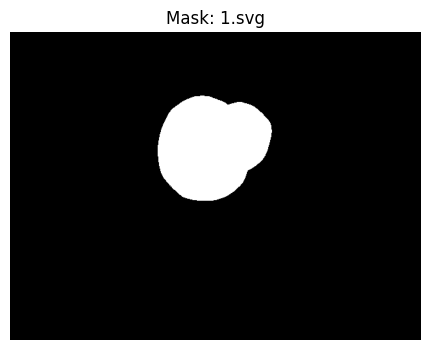

Saved mask: 13_mask.jpg


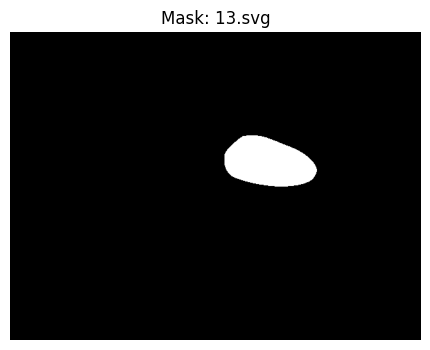

Saved mask: 14_mask.jpg


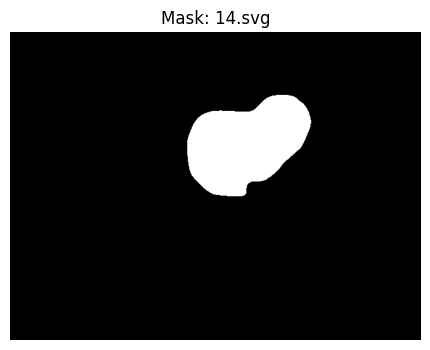

Saved mask: 2_mask.jpg


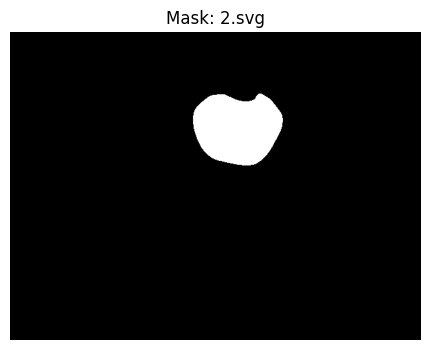

Saved mask: 20_mask.jpg


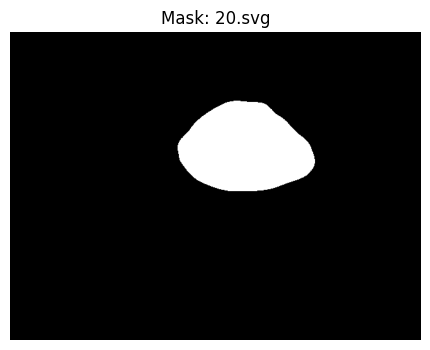

Saved mask: 19_mask.jpg


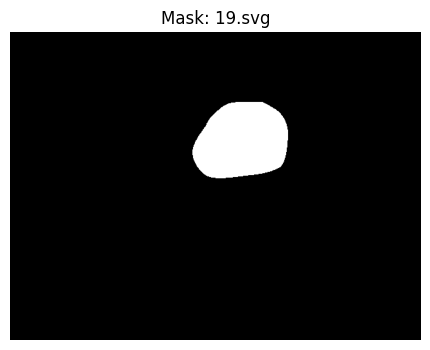

Saved mask: 11_mask.jpg


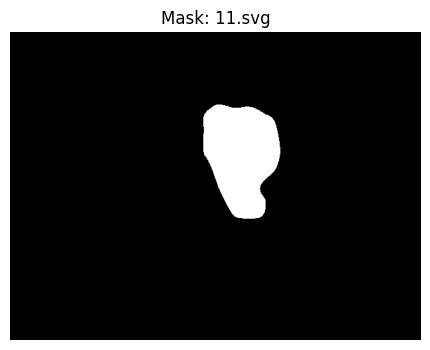

Saved mask: 5_mask.jpg


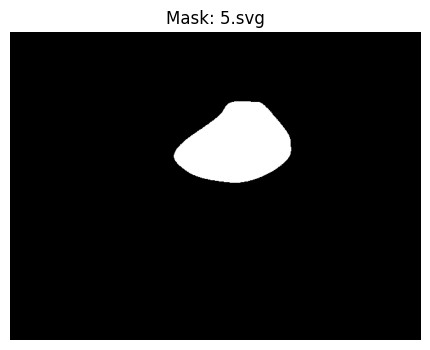

Saved mask: 17_mask.jpg


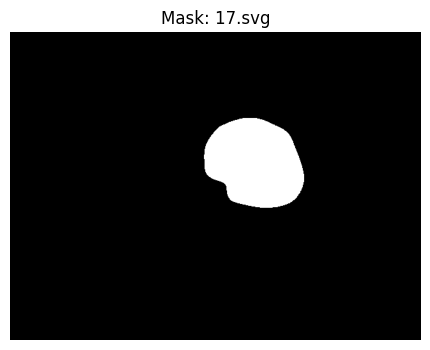

Saved mask: 24_mask.jpg


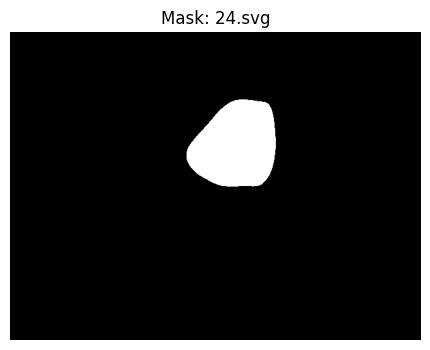

Saved mask: 29_mask.jpg


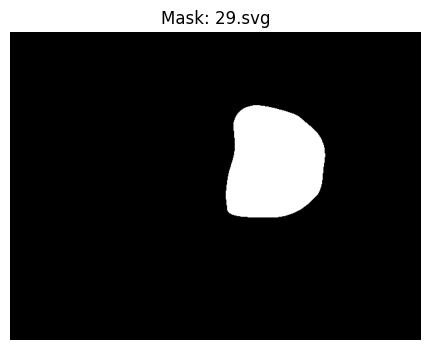

Saved mask: 23_mask.jpg


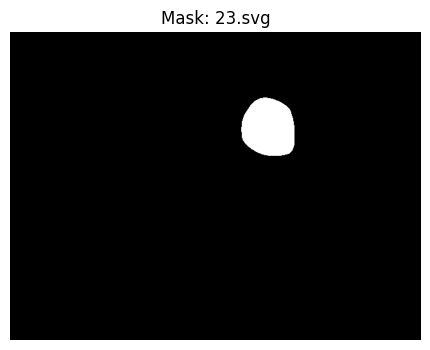

Saved mask: 12_mask.jpg


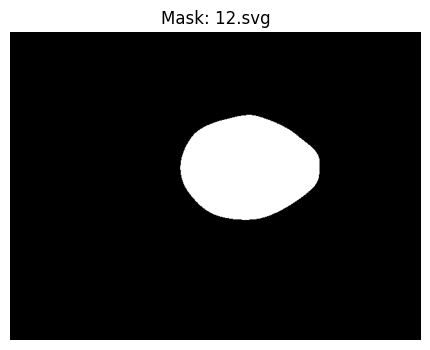

Saved mask: 26_mask.jpg


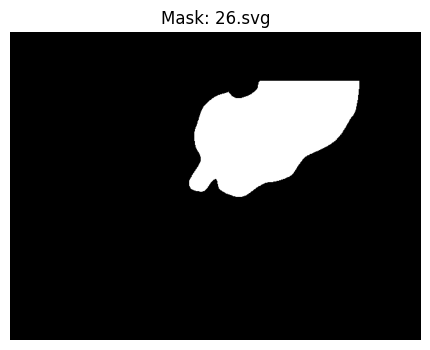

Saved mask: 21_mask.jpg


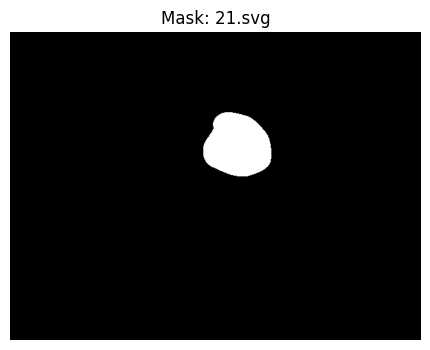

Saved mask: 16_mask.jpg


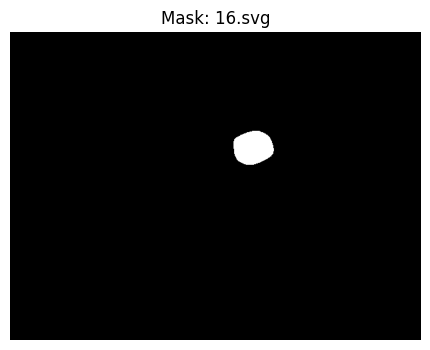

Saved mask: 3_mask.jpg


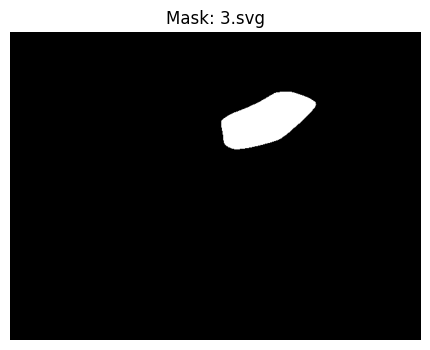

Saved mask: 28_mask.jpg


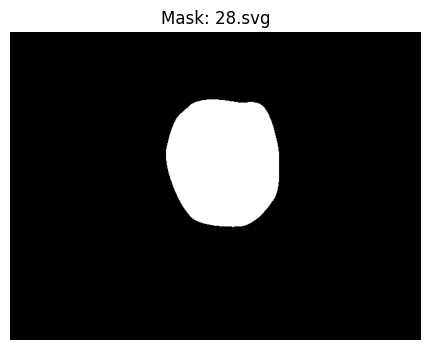

Saved mask: 7_mask.jpg


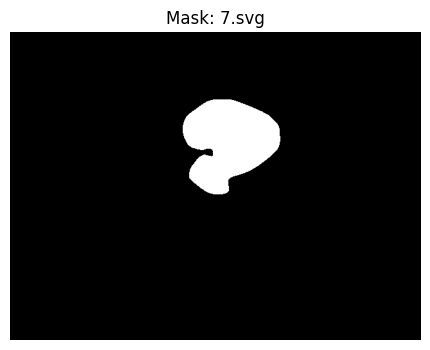

Saved mask: 4_mask.jpg


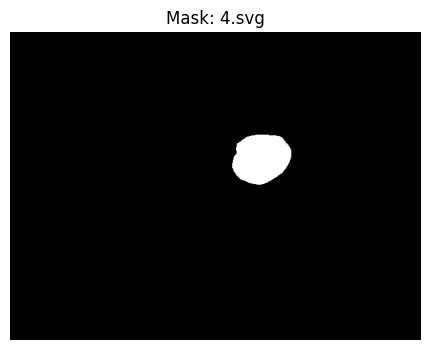

Saved mask: 10_mask.jpg


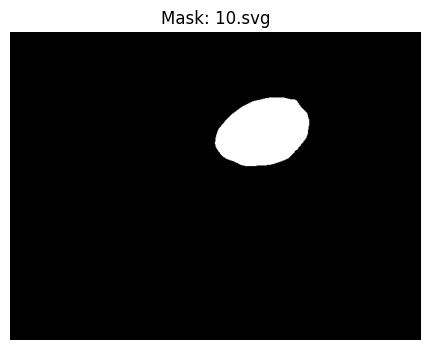

Saved mask: 27_mask.jpg


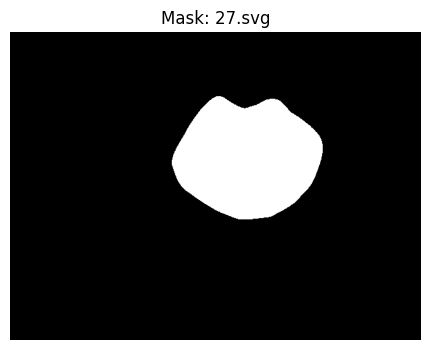

Saved mask: 15_mask.jpg


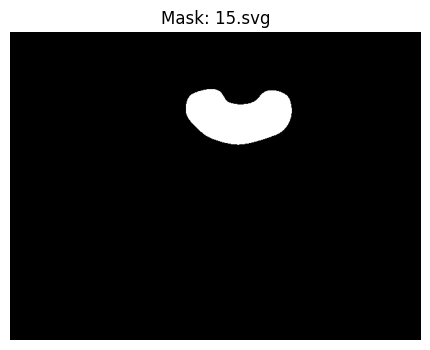

Saved mask: 25_mask.jpg


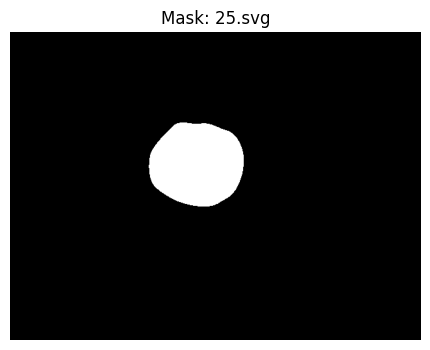

Saved mask: 6_mask.jpg


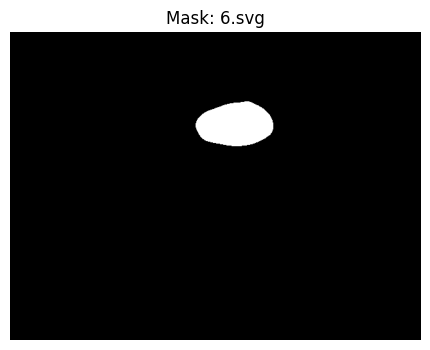

Saved mask: 9_mask.jpg


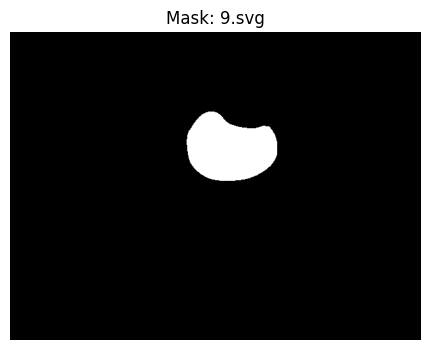

Saved mask: 8_mask.jpg


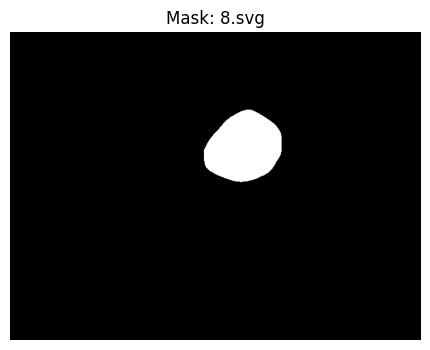

Saved mask: 18_mask.jpg


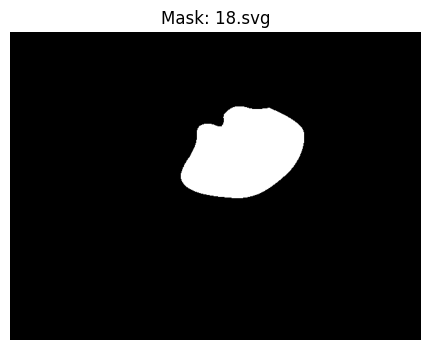

Saved mask: 22_mask.jpg


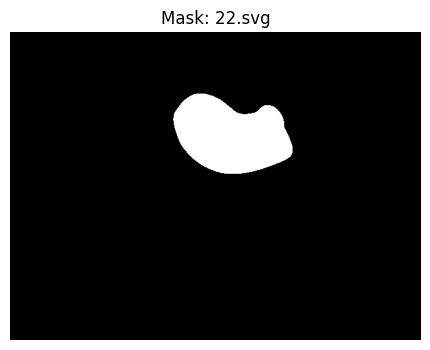

Saved mask: 70_mask.jpg


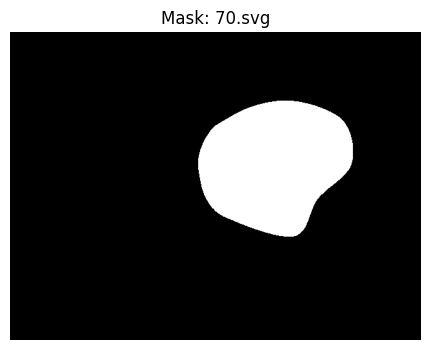

Saved mask: 50_mask.jpg


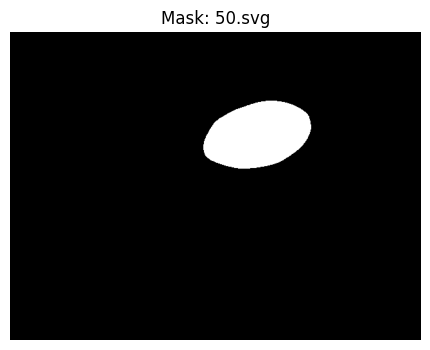

Saved mask: 49_mask.jpg


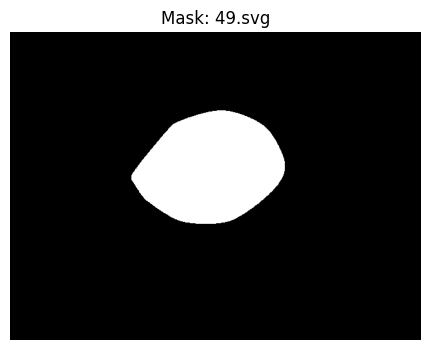

Saved mask: 40_mask.jpg


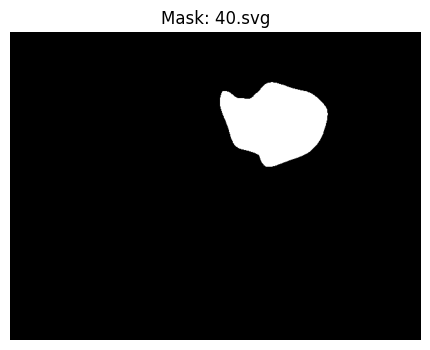

Saved mask: 77_mask.jpg


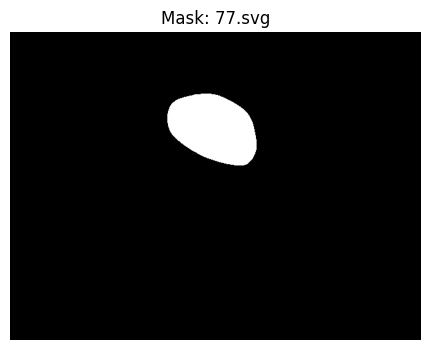

Saved mask: 107_mask.jpg


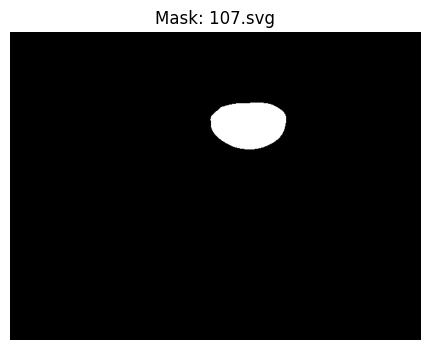

Saved mask: 131_mask.jpg


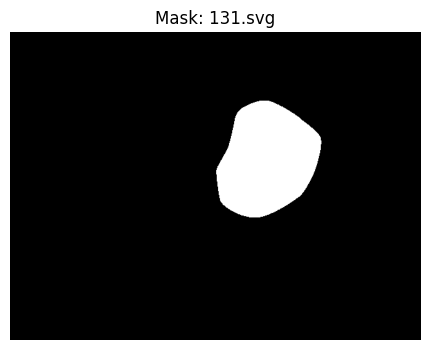

Saved mask: 37_mask.jpg


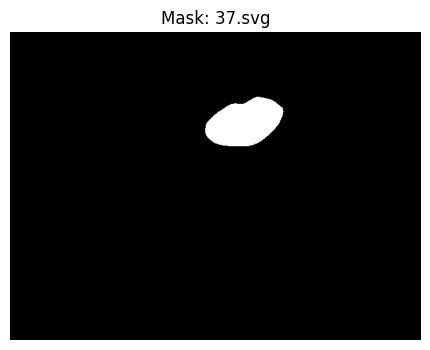

Saved mask: 122_mask.jpg


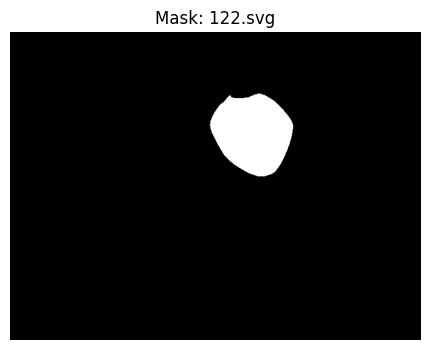

Saved mask: 130_mask.jpg


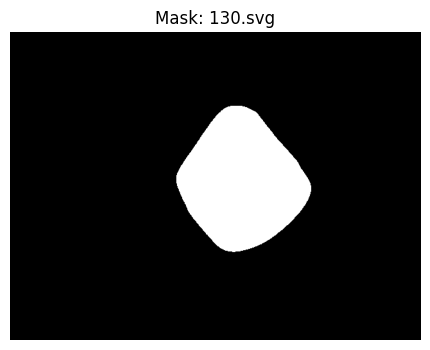

Saved mask: 126_mask.jpg


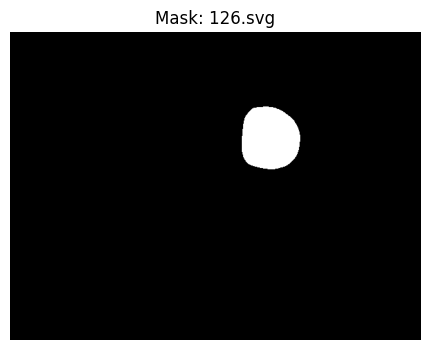

Saved mask: 30_mask.jpg


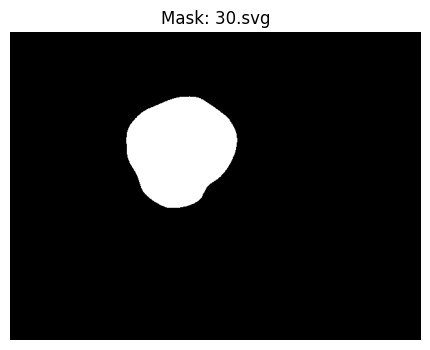

Saved mask: 113_mask.jpg


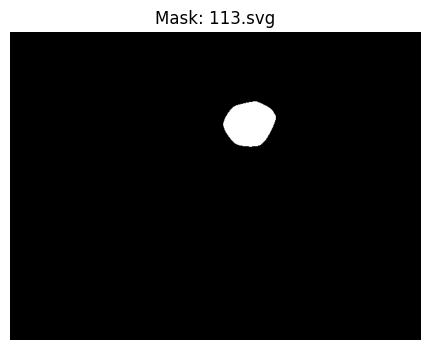

Saved mask: 76_mask.jpg


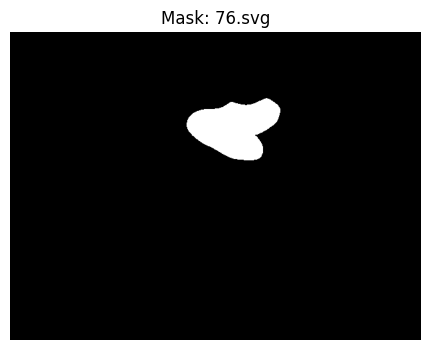

Saved mask: 98_mask.jpg


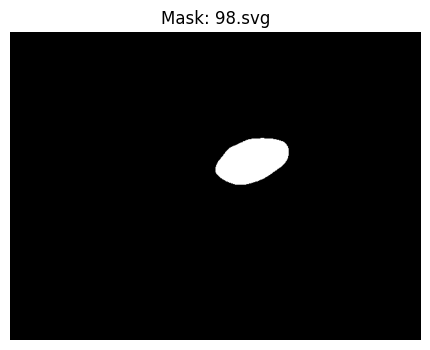

Saved mask: 75_mask.jpg


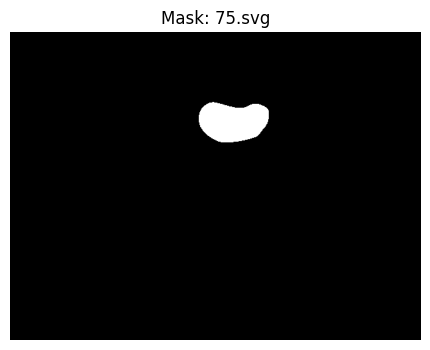

Saved mask: 32_mask.jpg


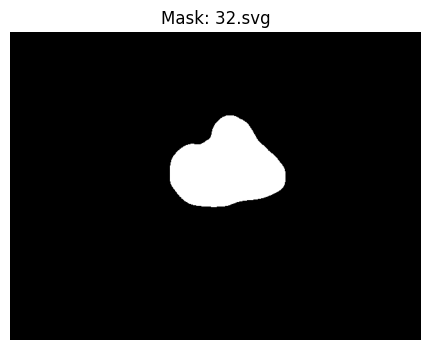

Saved mask: 105_mask.jpg


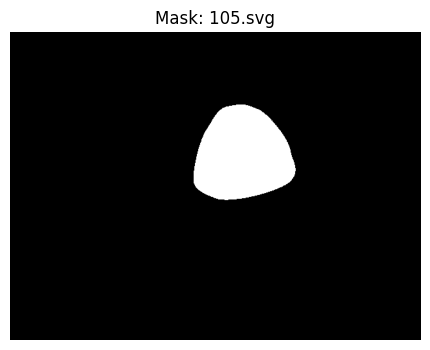

Saved mask: 65_mask.jpg


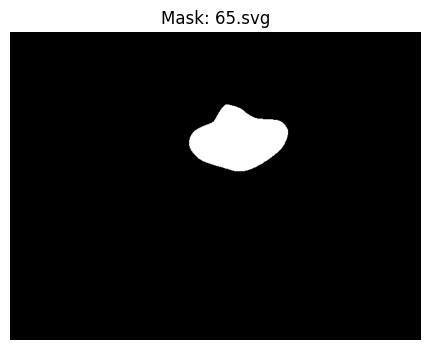

Saved mask: 119_mask.jpg


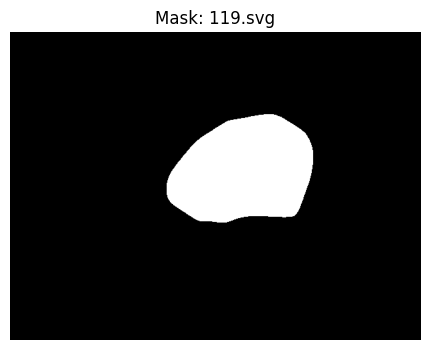

Saved mask: 47_mask.jpg


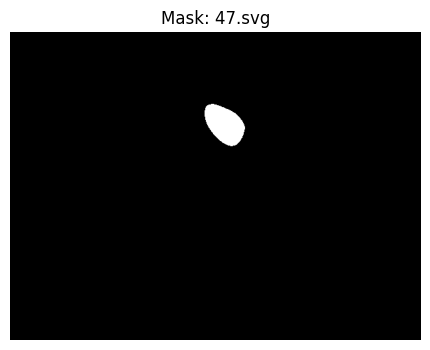

Saved mask: 112_mask.jpg


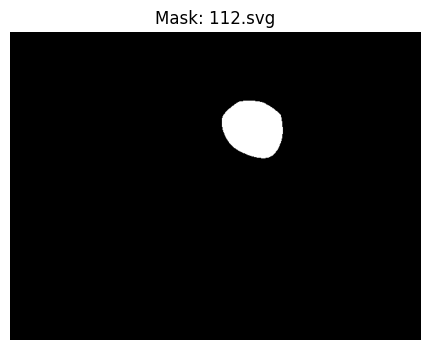

Saved mask: 63_mask.jpg


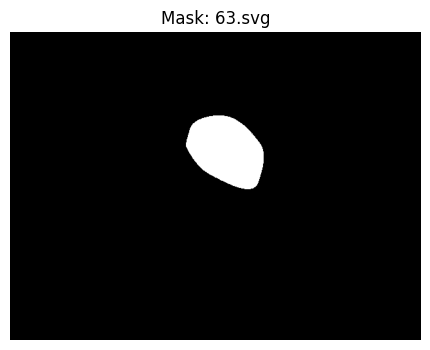

Saved mask: 92_mask.jpg


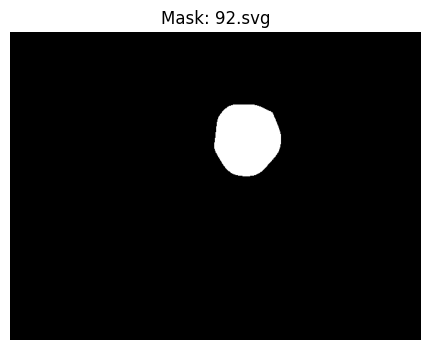

Saved mask: 115_mask.jpg


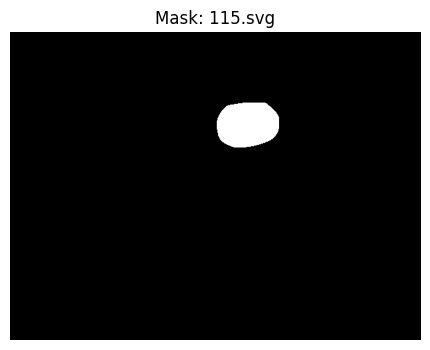

Saved mask: 53_mask.jpg


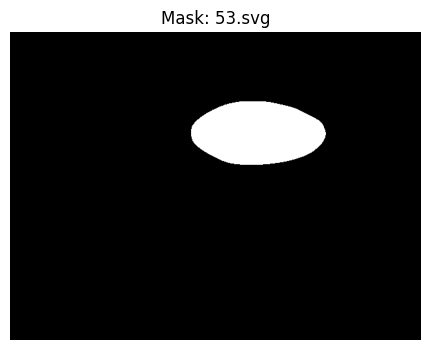

Saved mask: 71_mask.jpg


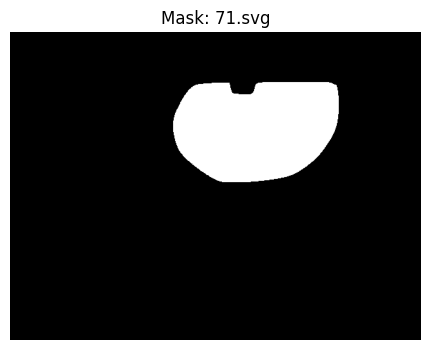

Saved mask: 62_mask.jpg


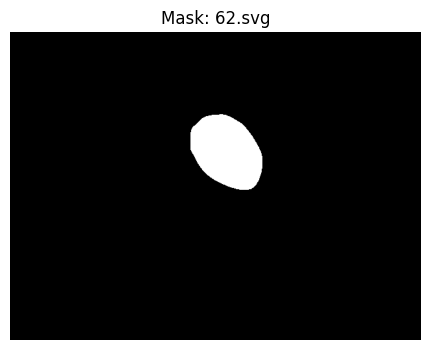

Saved mask: 123_mask.jpg


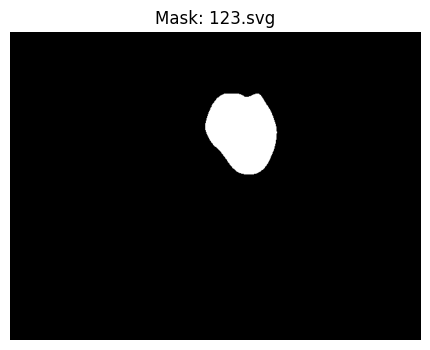

Saved mask: 69_mask.jpg


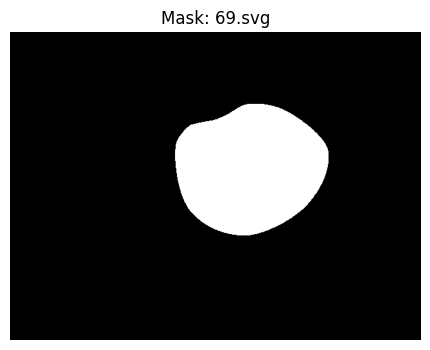

Saved mask: 111_mask.jpg


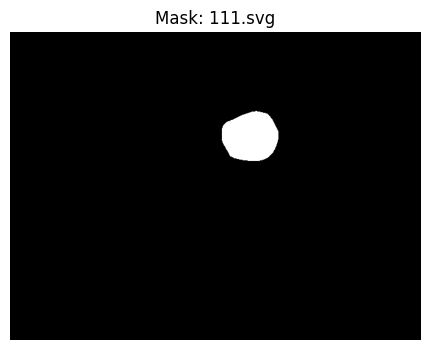

Saved mask: 60_mask.jpg


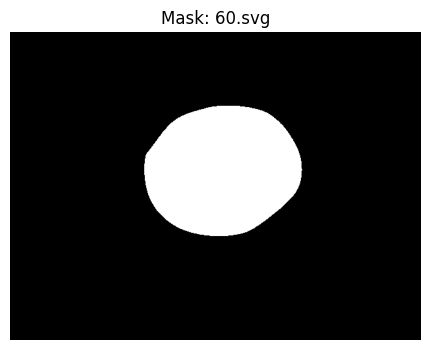

Saved mask: 102_mask.jpg


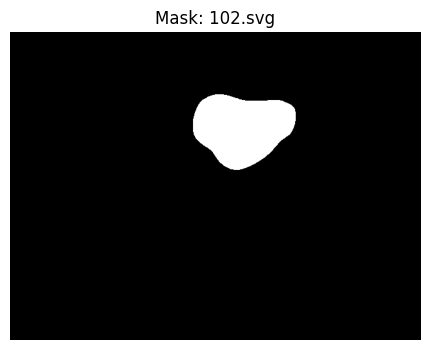

Saved mask: 57_mask.jpg


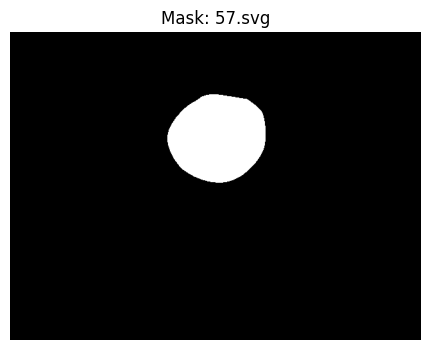

Saved mask: 85_mask.jpg


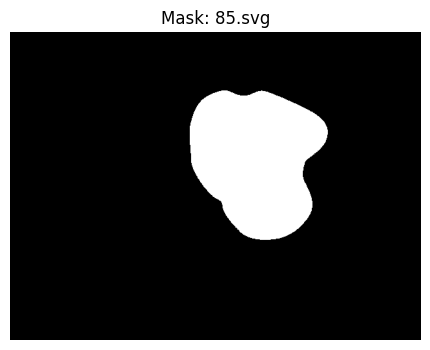

Saved mask: 82_mask.jpg


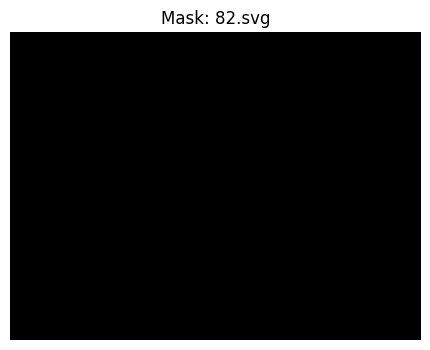

Saved mask: 127_mask.jpg


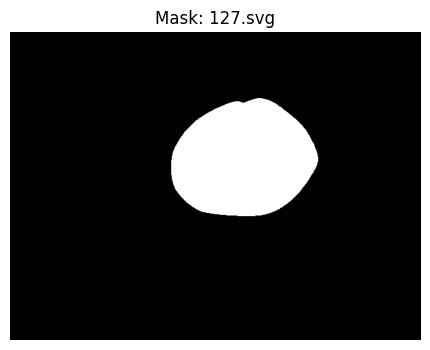

Saved mask: 67_mask.jpg


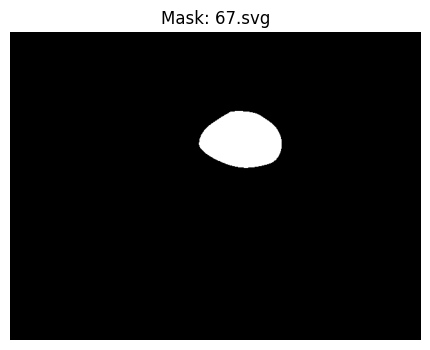

Saved mask: 91_mask.jpg


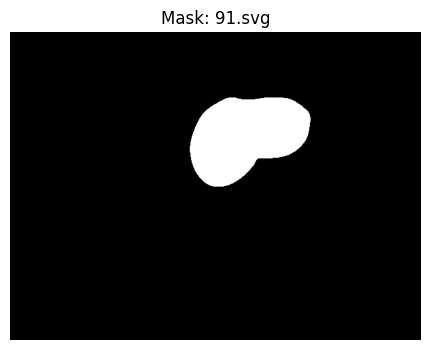

Saved mask: 116_mask.jpg


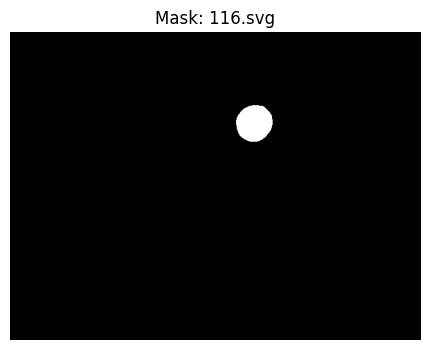

Saved mask: 86_mask.jpg


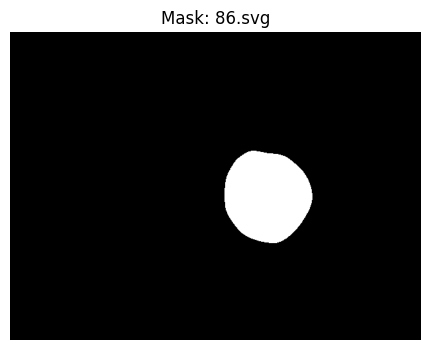

Saved mask: 73_mask.jpg


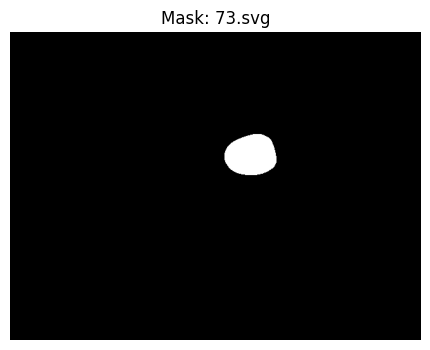

Saved mask: 41_mask.jpg


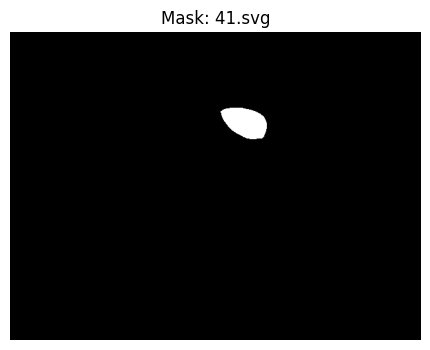

Saved mask: 103_mask.jpg


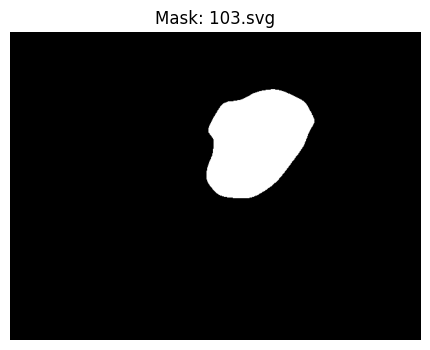

Saved mask: 93_mask.jpg


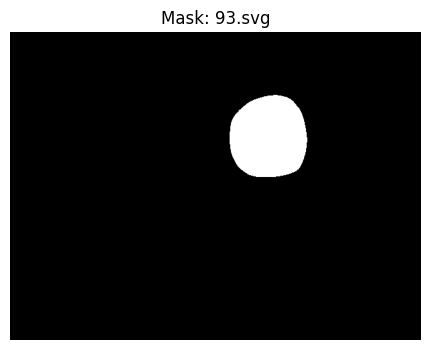

Saved mask: 55_mask.jpg


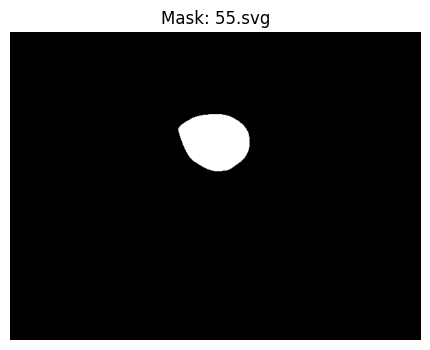

Saved mask: 51_mask.jpg


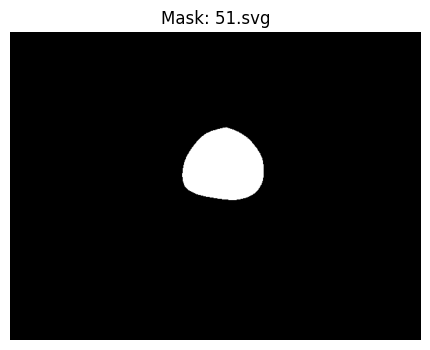

Saved mask: 94_mask.jpg


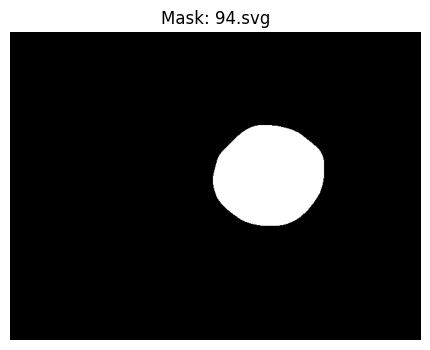

Saved mask: 58_mask.jpg


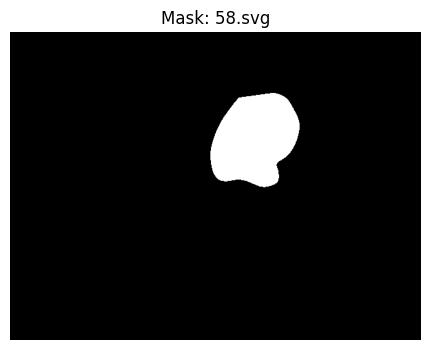

Saved mask: 110_mask.jpg


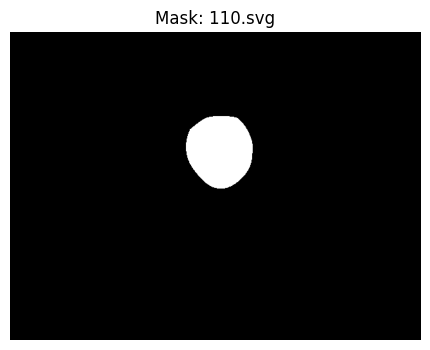

Saved mask: 109_mask.jpg


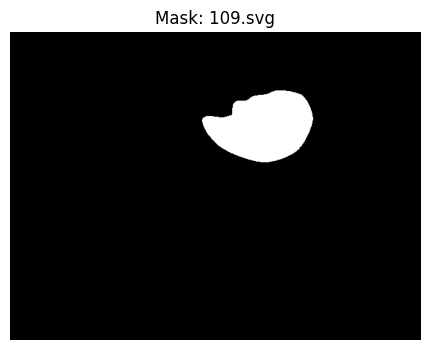

Saved mask: 124_mask.jpg


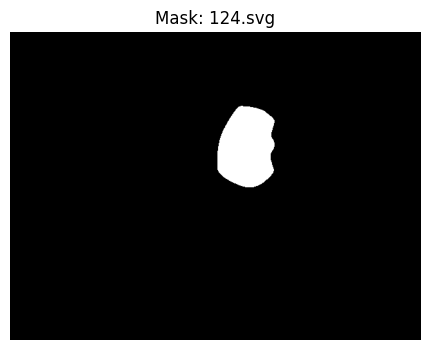

Saved mask: 72_mask.jpg


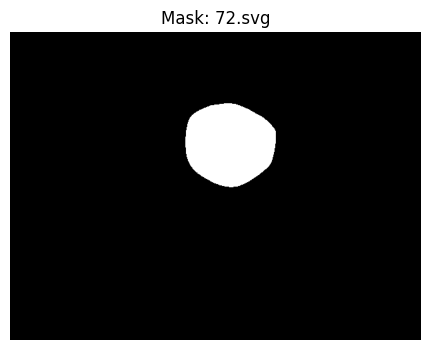

Saved mask: 35_mask.jpg


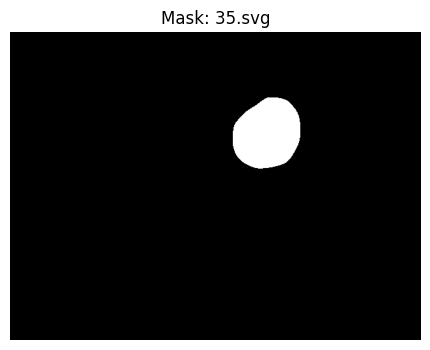

Saved mask: 81_mask.jpg


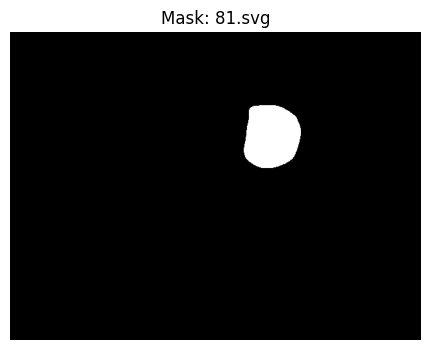

Saved mask: 56_mask.jpg


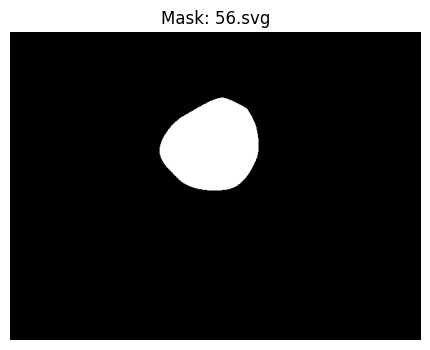

Saved mask: 90_mask.jpg


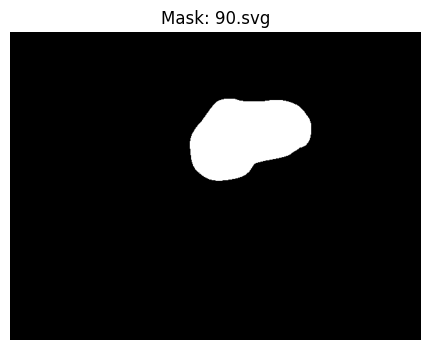

Saved mask: 36_mask.jpg


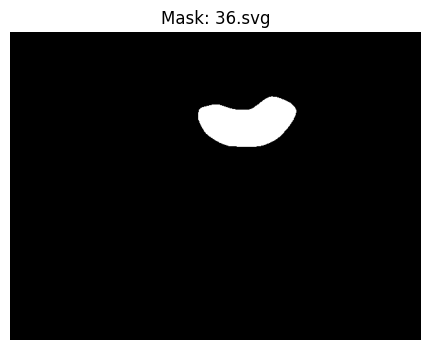

Saved mask: 59_mask.jpg


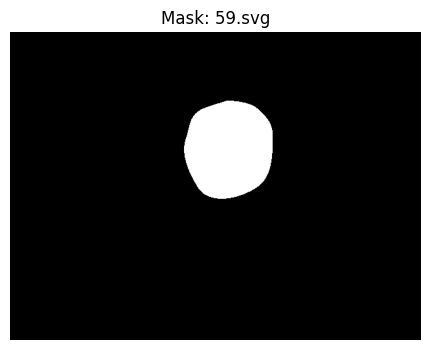

Saved mask: 44_mask.jpg


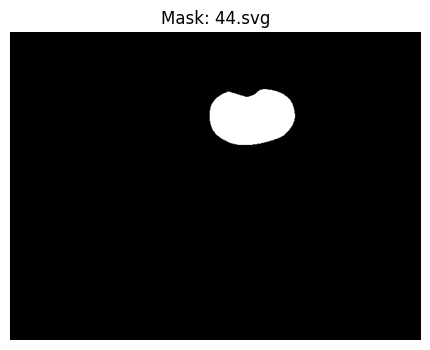

Saved mask: 68_mask.jpg


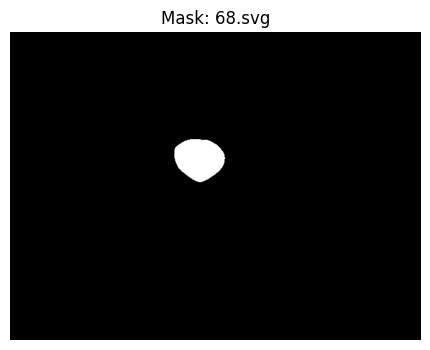

Saved mask: 108_mask.jpg


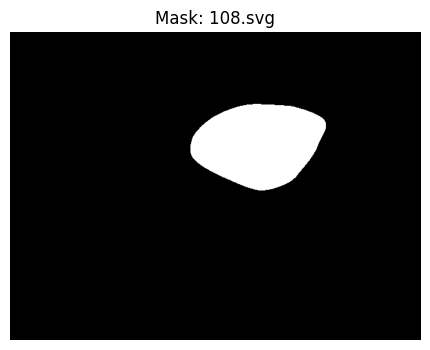

Saved mask: 46_mask.jpg


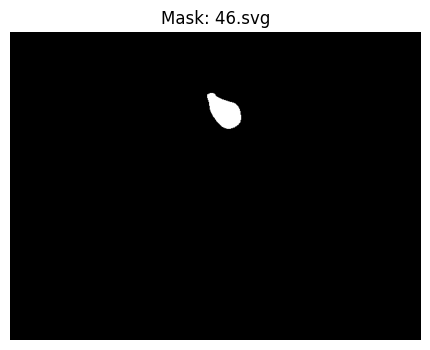

Saved mask: 48_mask.jpg


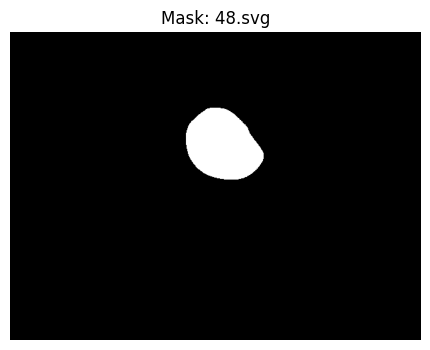

Saved mask: 33_mask.jpg


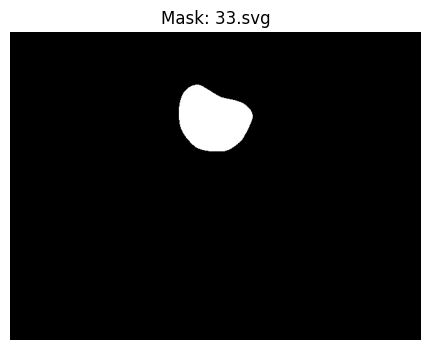

Saved mask: 45_mask.jpg


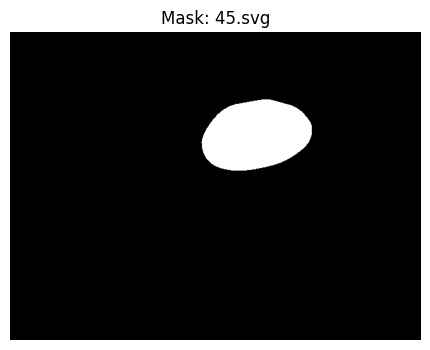

Saved mask: 129_mask.jpg


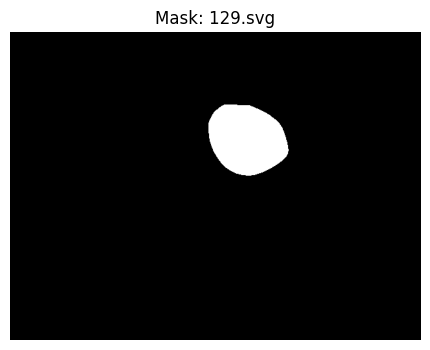

Saved mask: 99_mask.jpg


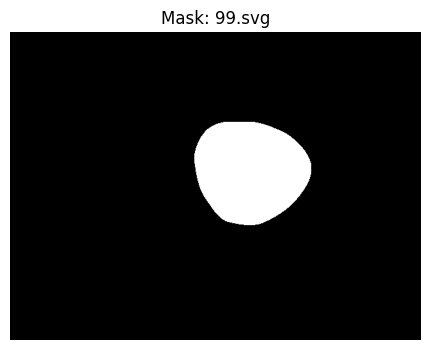

Saved mask: 97_mask.jpg


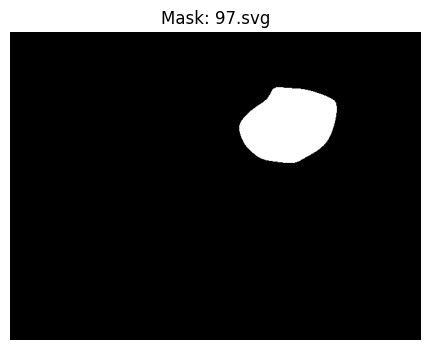

Saved mask: 42_mask.jpg


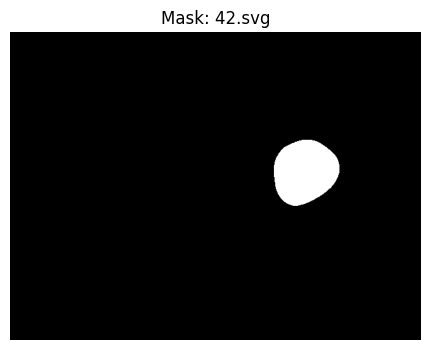

Saved mask: 54_mask.jpg


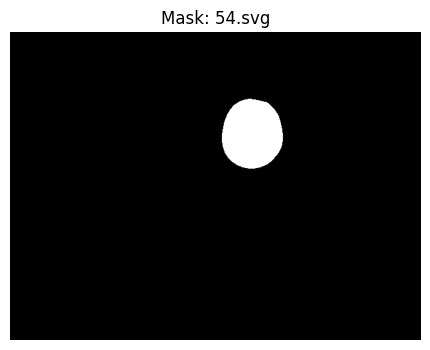

Saved mask: 128_mask.jpg


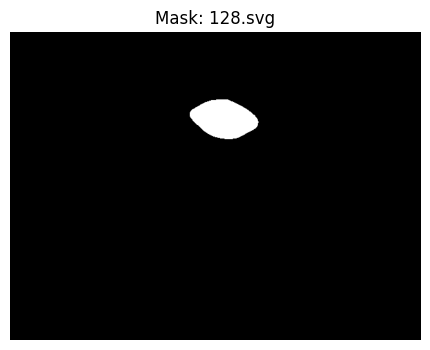

Saved mask: 43_mask.jpg


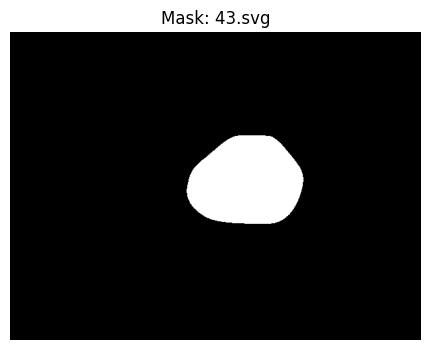

Saved mask: 74_mask.jpg


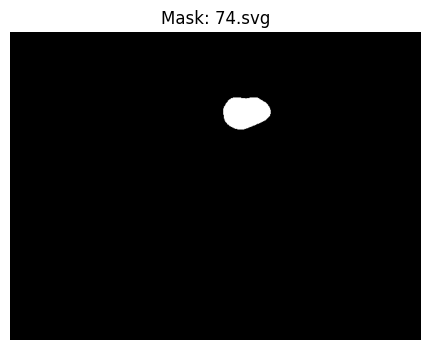

Saved mask: 120_mask.jpg


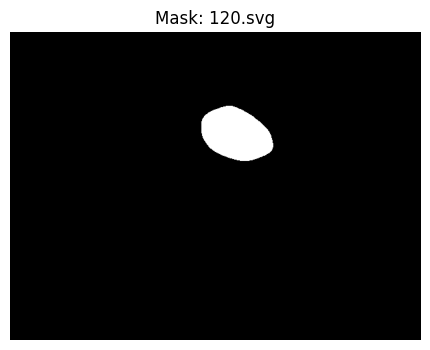

Saved mask: 114_mask.jpg


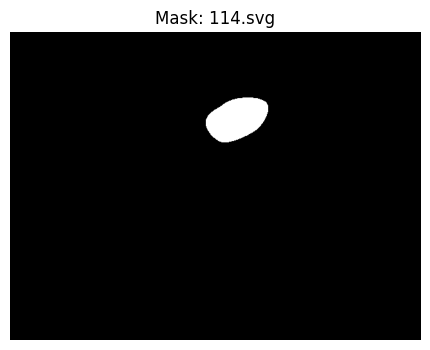

Saved mask: 100_mask.jpg


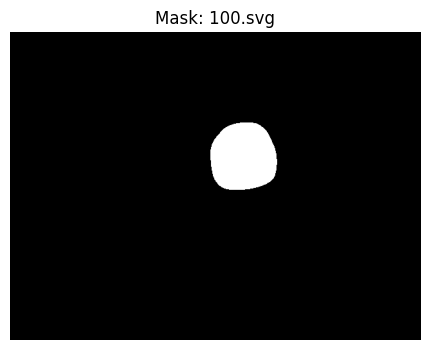

Saved mask: 87_mask.jpg


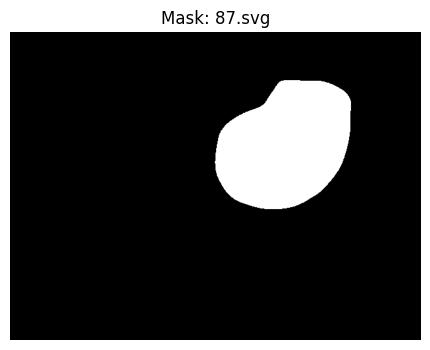

Saved mask: 117_mask.jpg


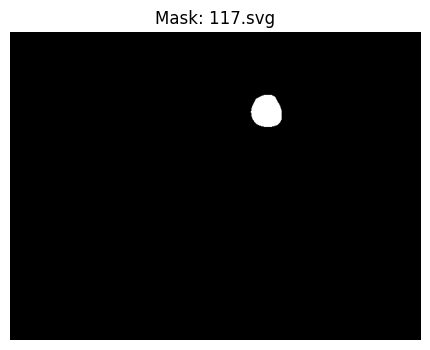

Saved mask: 96_mask.jpg


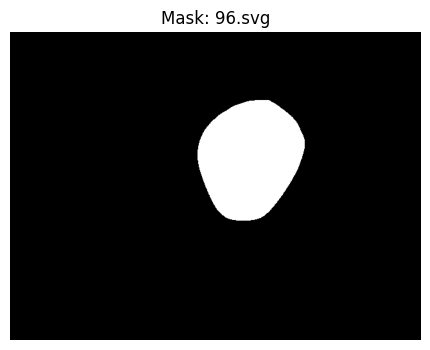

Saved mask: 34_mask.jpg


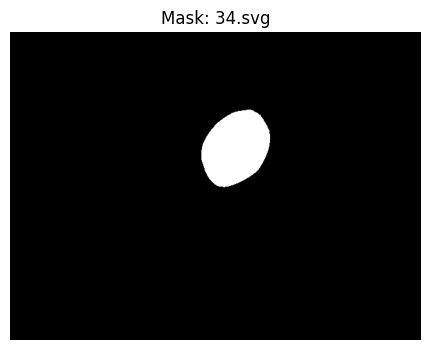

Saved mask: 61_mask.jpg


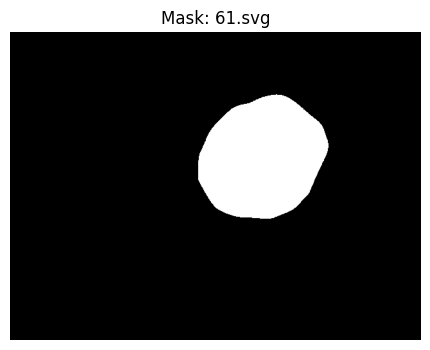

Saved mask: 83_mask.jpg


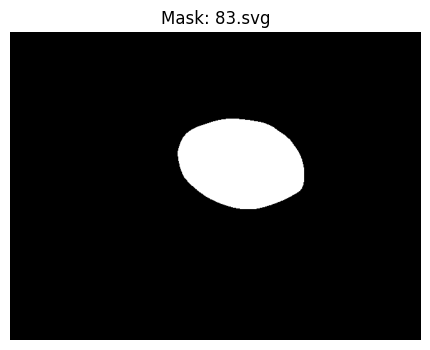

Saved mask: 104_mask.jpg


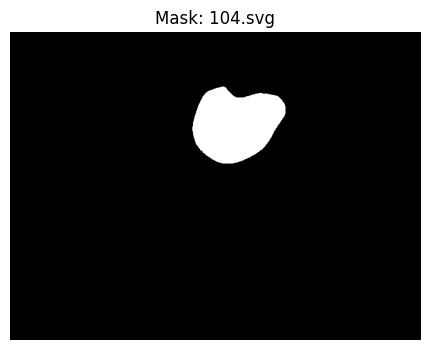

Saved mask: 84_mask.jpg


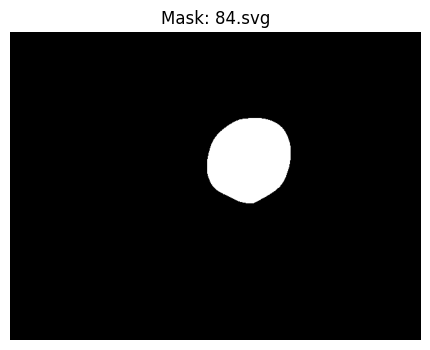

Saved mask: 38_mask.jpg


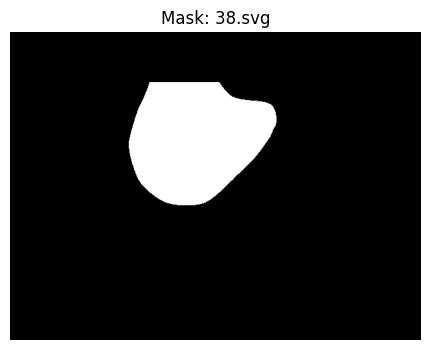

Saved mask: 106_mask.jpg


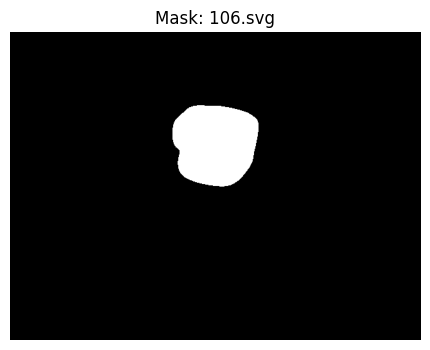

Saved mask: 118_mask.jpg


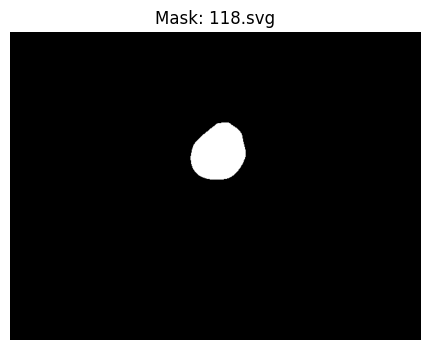

Saved mask: 64_mask.jpg


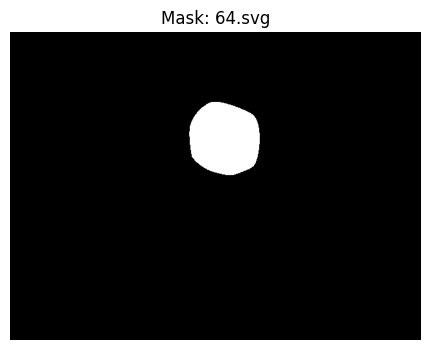

Saved mask: 121_mask.jpg


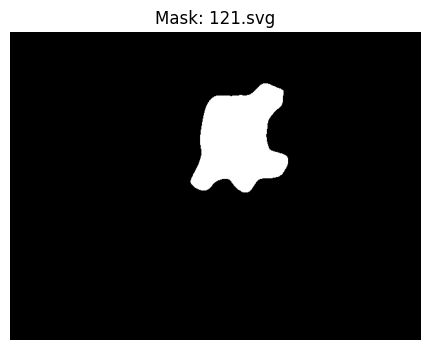

Saved mask: 52_mask.jpg


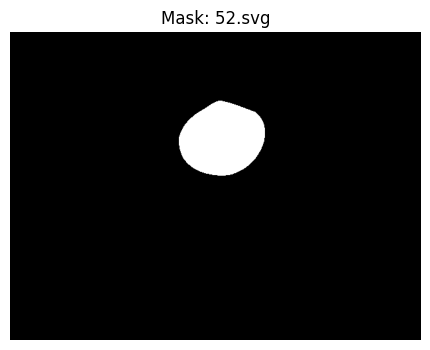

Saved mask: 88_mask.jpg


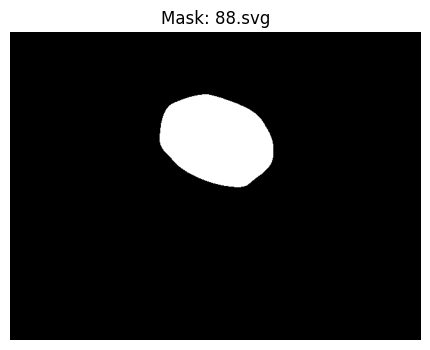

Saved mask: 66_mask.jpg


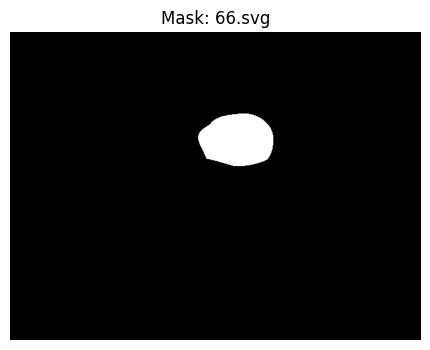

Saved mask: 78_mask.jpg


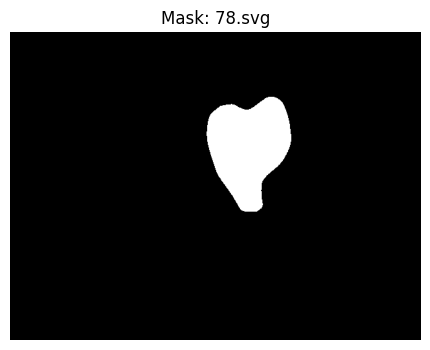

Saved mask: 80_mask.jpg


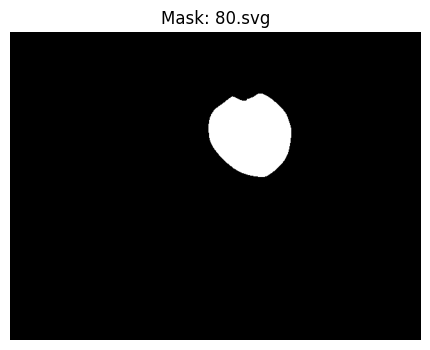

Saved mask: 95_mask.jpg


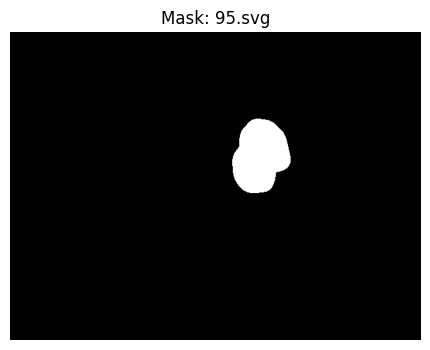

Saved mask: 101_mask.jpg


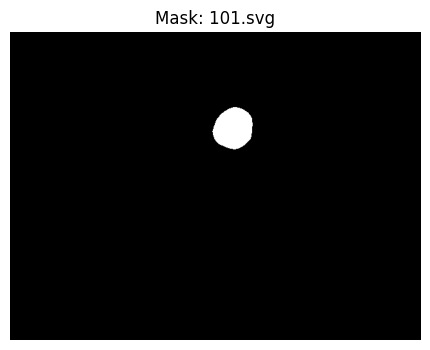

Saved mask: 31_mask.jpg


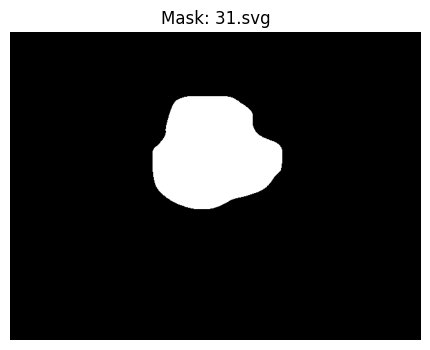

Saved mask: 39_mask.jpg


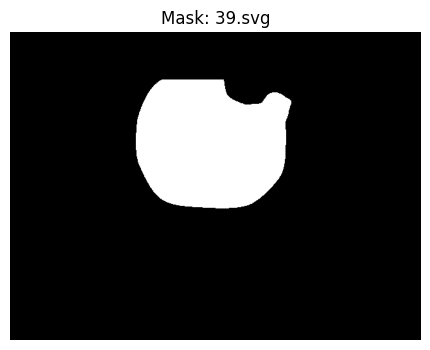

Saved mask: 125_mask.jpg


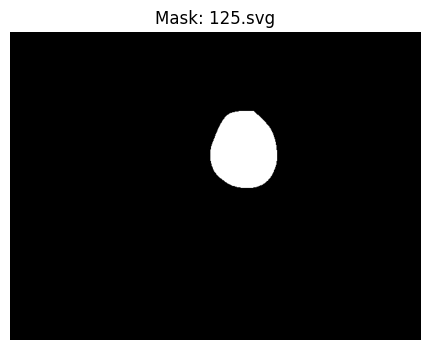

Saved mask: 79_mask.jpg


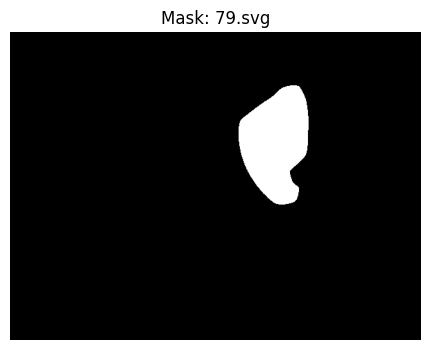

Saved mask: 89_mask.jpg


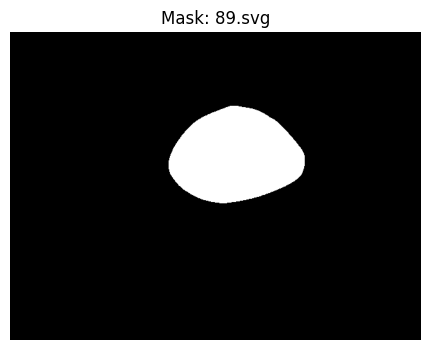

In [5]:
def path_to_points(path_str, n_points=1000):
    path = parse_path(path_str)
    points = []
    for i in np.linspace(0, 1, n_points):
        point = path.point(i)
        x, y = int(point.real), int(point.imag)
        points.append([x, y])
    return np.array(points, dtype=np.int32)

def extract_paths(svg_file):
    doc = minidom.parse(svg_file)
    path_strings = [p.getAttribute('d') for p in doc.getElementsByTagName('path')]
    doc.unlink()
    return path_strings

for filename in os.listdir(input_folder):
    if filename.endswith(".svg"):
        svg_path = os.path.join(input_folder, filename)
        path_data_list = extract_paths(svg_path)

        mask = np.zeros(image_size, dtype=np.uint8)

        for path_str in path_data_list:
            polygon = path_to_points(path_str, n_points=1000)
            cv2.fillPoly(mask, [polygon], 255)

        output_filename = os.path.splitext(filename)[0] + "_mask.jpg"
        output_path = os.path.join(output_folder, output_filename)
        cv2.imwrite(output_path, mask)
        print(f"Saved mask: {output_filename}")

        plt.figure(figsize=(6, 4))
        plt.imshow(mask, cmap='gray')
        plt.title(f"Mask: {filename}")
        plt.axis('off')
        plt.show()